# 0. Content

This script contains the following procedures:
+ data wrangling
+ data cleaning and consistency checks
+ creating merge keys merging dataframes
+ visual exploration via scatterplots 
+ creating test and fit datasets
+ supervised linear regression
+ linear regrestion statistics

# 1. Importing Libraries and Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# creating main path
path = r'C:\Users\muffi\OneDrive\CareerFoundry\World Happiness Index Analysis 2023'

In [3]:
# importing World Happiness Report df
df_whia = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'World Happiness Report.csv'))
df_whia.shape

(2199, 13)

In [4]:
# importing world GDP df
df_country_info = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'world_country_gdp_usd.csv'))
df_country_info.shape

(16492, 5)

In [5]:
# showing visuals without calling them
%matplotlib inline

In [6]:
# setting max number of colums
pd.set_option('display.max_rows', 500)

# 2. Data Wrangling

## 2.1. Dropping Columns 

In [7]:
# checking the WHIA columns
df_whia.columns

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

The 'Positive Affect,' 'Negative Affect,' and 'Confidence In National Govenment' columns are not relavant to the analysis and thus will be dropped

In [8]:
# dropping irrelavant columns 
df_whia_drop = df_whia.drop(columns = ['Positive Affect', 'Negative Affect', 'Confidence In National Government'])

In [9]:
# checking remaining columns for WHIA df
df_whia_drop.columns

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption'],
      dtype='object')

In [10]:
# checking GDP info columns 
df_country_info.columns

Index(['Country Name', 'Country Code', 'year', 'GDP_USD',
       'GDP_per_capita_USD'],
      dtype='object')

All of the columns are relavant to the analysis, including 'Country Code' for future merging use

In [11]:
# renaming df for consistency 
df_gdp_drop = df_country_info

In [12]:
# checking GDP info columns 
df_gdp_drop.columns

Index(['Country Name', 'Country Code', 'year', 'GDP_USD',
       'GDP_per_capita_USD'],
      dtype='object')

## 2.2. Renaming Columns 

In [13]:
# list of renamed WHIA cols
whia_rename = {
    'Country Name' : 'country_name', 
    'Regional Indicator' : 'region', 
    'Year' : 'year', 
    'Life Ladder' : 'happiness_score',
    'Log GDP Per Capita' : 'log_gdp_score', 
    'Social Support' : 'social_support_score',
    'Healthy Life Expectancy At Birth' : 'life_expectancy_at_birth', 
    'Freedom To Make Life Choices' : 'freedom_score',
    'Generosity' : 'generosity_score', 
    'Perceptions Of Corruption' : 'corruption_score'
}

In [14]:
# renaming WHIA columns 
df_whia_rename = df_whia_drop.rename(columns = whia_rename)

In [15]:
# checking WHIA cols
df_whia_rename.columns

Index(['country_name', 'region', 'year', 'happiness_score', 'log_gdp_score',
       'social_support_score', 'life_expectancy_at_birth', 'freedom_score',
       'generosity_score', 'corruption_score'],
      dtype='object')

In [16]:
# list of renamed GDP info cols 
gdp_rename = {
    'Country Name' : 'country_name', 
    'Country Code' : 'country_code', 
    'GDP_USD': 'gdp_usd',
    'GDP_per_capita_USD' : 'gdp_capita_usd'
}

In [17]:
# renaming GDP info cols
df_gdp_rename = df_gdp_drop.rename(columns = gdp_rename)

In [18]:
# checking the GDP info cols
df_gdp_rename.columns

Index(['country_name', 'country_code', 'year', 'gdp_usd', 'gdp_capita_usd'], dtype='object')

## 2.3. Checking Column Data Types

In [19]:
# checking WHIA df data types
df_whia_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_name              2199 non-null   object 
 1   region                    2087 non-null   object 
 2   year                      2199 non-null   int64  
 3   happiness_score           2199 non-null   float64
 4   log_gdp_score             2179 non-null   float64
 5   social_support_score      2186 non-null   float64
 6   life_expectancy_at_birth  2145 non-null   float64
 7   freedom_score             2166 non-null   float64
 8   generosity_score          2126 non-null   float64
 9   corruption_score          2083 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 171.9+ KB


All of the data types are as they should be

In [20]:
# renaming WHIA df for consistency 
df_whia_type = df_whia_rename

In [21]:
# checking data types again
df_whia_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_name              2199 non-null   object 
 1   region                    2087 non-null   object 
 2   year                      2199 non-null   int64  
 3   happiness_score           2199 non-null   float64
 4   log_gdp_score             2179 non-null   float64
 5   social_support_score      2186 non-null   float64
 6   life_expectancy_at_birth  2145 non-null   float64
 7   freedom_score             2166 non-null   float64
 8   generosity_score          2126 non-null   float64
 9   corruption_score          2083 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 171.9+ KB


In [22]:
# checking GDP info data types
df_gdp_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    16492 non-null  object 
 1   country_code    16492 non-null  object 
 2   year            16492 non-null  int64  
 3   gdp_usd         13118 non-null  float64
 4   gdp_capita_usd  13115 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 644.3+ KB


All of the data types are as they should be

In [23]:
# renaming GDP info df for consistency
df_gdp_type = df_gdp_rename

In [24]:
# checking GDP info data types
df_gdp_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    16492 non-null  object 
 1   country_code    16492 non-null  object 
 2   year            16492 non-null  int64  
 3   gdp_usd         13118 non-null  float64
 4   gdp_capita_usd  13115 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 644.3+ KB


## 2.4. Transposing Data

No data needs to be transposed

In [25]:
# renaming WHIA df for consistency
df_whia_wrang = df_whia_type

In [26]:
# renaming GDP info for consistency
df_gdp_wrang = df_gdp_type

# 3. Cleaning and Consistency Checks

## 3.1. Missing Data

In [27]:
# checking for missign data in the WHIA df
df_whia_wrang.isnull().sum()

country_name                  0
region                      112
year                          0
happiness_score               0
log_gdp_score                20
social_support_score         13
life_expectancy_at_birth     54
freedom_score                33
generosity_score             73
corruption_score            116
dtype: int64

The following are the missign values and their proposed solutions:
+ region mising 112 entries --> these can be added in based on country name
+ log_gdp_score missing 20 entries --> check for a relationship between the missing entries; if they are random, input the mean
+ social_support_score missing 13 entries --> check for a relationship between the missing entries; if they are random, input the mean
+ life_expectancy_at_birth missing 54 entries --> check for a relationship between the missing entries; if they are random, input the mean
+ freedom_score missing 33 entries --> check for a relationship between the missing entries; if they are random, input the mean
+ generosity_score missing miissing 73 entries --> check for a relationship between the missing entries; if they are random, input the mean
+ corruption_score missing 116 entries --> check for a relationship between the missing entries; if they are random, input the mean

In [28]:
# viewing missing regions
df_whia_wrang.loc[df_whia_wrang['region'].isnull() == True]

,country_name,region,year,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score
39,Angola,NaN,2011,5.589001,8.944346,0.723094,51.220001,0.583702,0.052619,0.911320
40,Angola,NaN,2012,4.360250,8.988708,0.752593,51.840000,0.456029,-0.138630,0.906300
41,Angola,NaN,2013,3.937107,8.999667,0.721591,52.459999,0.409555,-0.105992,0.816375
42,Angola,NaN,2014,3.794838,9.009897,0.754615,53.080002,0.374542,-0.170031,0.834076
179,Belize,NaN,2007,6.450644,9.191672,0.872267,64.300003,0.705306,0.008450,0.768984
180,Belize,NaN,2014,5.955647,9.135220,0.756932,65.000000,0.873569,0.001100,0.782105
195,Bhutan,NaN,2013,5.569092,9.097065,0.818949,62.240002,0.810201,0.351611,0.802428
196,Bhutan,NaN,2014,4.938578,9.143029,0.880342,62.419998,0.834222,0.266661,0.650338
197,Bhutan,NaN,2015,5.082129,9.197989,0.847574,62.599998,0.830102,0.275951,0.633956
344,Central African Republic,NaN,2007,4.160130,6.945774,0.532297,41.480000,0.662871,0.082950,0.782131


In [29]:
# creating df of missing regions
df_region_null = df_whia_wrang.loc[df_whia_wrang['region'].isnull() == True][['country_name', 'region']]

In [30]:
# checking nulls
df_region_null['country_name'].value_counts()

Turkiye                     16
State of Palestine          15
Czechia                     14
Congo (Kinshasa)             9
Syria                        7
Qatar                        5
Trinidad and Tobago          5
Central African Republic     5
Sudan                        5
South Sudan                  4
Somaliland region            4
Angola                       4
Djibouti                     4
Somalia                      3
Eswatini                     3
Bhutan                       3
Belize                       2
Guyana                       1
Suriname                     1
Cuba                         1
Oman                         1
Name: country_name, dtype: int64

In [31]:
# listing region options
df_whia_wrang['region'].value_counts()

Sub-Saharan Africa                    443
Latin America and Caribbean           321
Western Europe                        303
Central and Eastern Europe            241
Middle East and North Africa          204
Commonwealth of Independent States    188
Southeast Asia                        132
South Asia                             97
East Asia                              92
North America and ANZ                  66
Name: region, dtype: int64

In [32]:
# Central and East European country additions
df_whia_wrang.loc[(df_whia_wrang['country_name'] == 'Turkiye') | 
                  (df_whia_wrang['country_name'] == 'Czechia'), 'region'] = 'Central and Eastern Europe'

In [33]:
# Middle Eastern and North African country additions
df_whia_wrang.loc[(df_whia_wrang['country_name'] == 'State of Palestine') |
                  (df_whia_wrang['country_name'] == 'Syria') |
                  (df_whia_wrang['country_name'] == 'Qatar') |
                  (df_whia_wrang['country_name'] == 'Sudan') |
                  (df_whia_wrang['country_name'] == 'Oman'), 'region'] = 'Middle East and North Africa'

In [34]:
# Sub-Saharan African country entries 
df_whia_wrang.loc[(df_whia_wrang['country_name'] == 'Congo (Kinshasa)') |
                  (df_whia_wrang['country_name'] == 'Central African Republic') |
                  (df_whia_wrang['country_name'] == 'South Sudan') |
                  (df_whia_wrang['country_name'] == 'Somaliland region') |
                  (df_whia_wrang['country_name'] == 'Angola') |
                  (df_whia_wrang['country_name'] == 'Djibouti') |
                  (df_whia_wrang['country_name'] == 'Somalia') |
                  (df_whia_wrang['country_name'] == 'Eswatini'), 'region'] = 'Sub-Saharan Africa'

In [35]:
# Latin american and Caribbean country entries
df_whia_wrang.loc[(df_whia_wrang['country_name'] == 'Trinidad and Tobago') |
                  (df_whia_wrang['country_name'] == 'Belize') |
                  (df_whia_wrang['country_name'] == 'Guyana') |
                  (df_whia_wrang['country_name'] == 'Suriname') |
                  (df_whia_wrang['country_name'] == 'Cuba'), 'region'] = 'Latin America and Caribbean'

In [36]:
# South Asain country entries
df_whia_wrang.loc[df_whia_wrang['country_name'] == 'Bhutan', 'region'] = 'South Asia'

In [37]:
#### checkign regions for neighboring countries 
df_whia_wrang.loc[df_whia_wrang['country_name'] == 'Saudi Arabia']

,country_name,region,year,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score
1648,Saudi Arabia,Middle East and North Africa,2005,7.079644,10.674833,0.867819,61.200001,NaN,NaN,0.505149
1649,Saudi Arabia,Middle East and North Africa,2007,7.266694,10.641758,0.891525,61.599998,0.622070,0.003791,NaN
1650,Saudi Arabia,Middle East and North Africa,2008,6.811370,10.663842,0.823054,61.799999,0.531812,-0.022041,0.507919
1651,Saudi Arabia,Middle East and North Africa,2009,6.147590,10.605604,0.921288,62.000000,0.639406,-0.109222,0.445132
1652,Saudi Arabia,Middle East and North Africa,2010,6.307098,10.622705,0.879598,62.200001,0.677777,-0.031792,NaN
1653,Saudi Arabia,Middle East and North Africa,2011,6.699790,10.693172,0.829634,62.400002,0.603456,-0.141503,NaN
1654,Saudi Arabia,Middle East and North Africa,2012,6.396359,10.723874,0.867101,62.599998,0.560455,-0.119786,NaN
1655,Saudi Arabia,Middle East and North Africa,2013,6.495133,10.729292,0.826695,62.799999,0.661042,-0.082016,NaN
1656,Saudi Arabia,Middle East and North Africa,2014,6.278378,10.744945,0.818420,63.000000,0.762252,-0.074081,NaN
1657,Saudi Arabia,Middle East and North Africa,2015,6.345492,10.765942,0.819750,63.200001,0.820207,-0.046799,NaN


In [38]:
# checking for null regions
df_whia_wrang.isnull().sum()

country_name                  0
region                        0
year                          0
happiness_score               0
log_gdp_score                20
social_support_score         13
life_expectancy_at_birth     54
freedom_score                33
generosity_score             73
corruption_score            116
dtype: int64

In [39]:
# checking for trends in missing log_gdp_score
df_whia_wrang.loc[df_whia_wrang['log_gdp_score'].isnull() == True]

,country_name,region,year,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score
13,Afghanistan,South Asia,2022,1.281271,NaN,0.228217,54.875000,0.368377,NaN,0.733198
475,Cuba,Latin America and Caribbean,2006,5.417869,NaN,0.969595,68.000000,0.281458,NaN,NaN
490,Cyprus,Western Europe,2022,5.864757,NaN,0.819547,73.000000,0.698407,NaN,0.887328
1031,Kosovo,Central and Eastern Europe,2007,5.103906,NaN,0.847812,NaN,0.381364,NaN,0.894462
1237,Malta,Western Europe,2022,6.299238,NaN,0.932083,71.650002,0.837544,NaN,0.757540
1755,Somaliland region,Sub-Saharan Africa,2009,4.991400,NaN,0.879567,NaN,0.746304,NaN,0.513372
1756,Somaliland region,Sub-Saharan Africa,2010,4.657363,NaN,0.829005,NaN,0.820182,NaN,0.471094
1757,Somaliland region,Sub-Saharan Africa,2011,4.930572,NaN,0.787962,NaN,0.858104,NaN,0.357341
1758,Somaliland region,Sub-Saharan Africa,2012,5.057314,NaN,0.786291,NaN,0.758219,NaN,0.333832
1792,South Sudan,Sub-Saharan Africa,2014,3.831992,NaN,0.545118,52.880001,0.567259,NaN,0.741541


Most of the values missing log_gdp_score values are missing other values, but the rows still hold valueable information. The mean of the col with be inputting for missing values

In [40]:
# finding mean values
df_whia_wrang.describe()

,year,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276


In [41]:
# inputting the mean for the missing gdp score values
df_whia_wrang['log_gdp_score'].fillna(9.389766, inplace = True)

In [42]:
# checking for trends in missing social support score
df_whia_wrang.loc[df_whia_wrang['social_support_score'].isnull() == True]

,country_name,region,year,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score
29,Algeria,Middle East and North Africa,2010,5.463567,9.306355,NaN,65.500000,0.592696,-0.209753,0.618038
126,Bahrain,Middle East and North Africa,2014,6.165134,10.801981,NaN,65.959999,NaN,NaN,NaN
328,Canada,North America and ANZ,2007,7.481753,10.733970,NaN,70.620003,0.930341,0.245596,0.405608
524,Djibouti,Sub-Saharan Africa,2010,5.005811,7.934187,NaN,54.599998,0.763730,-0.068953,0.596910
1053,Kuwait,Middle East and North Africa,2014,6.180139,10.925643,NaN,70.000000,NaN,NaN,NaN
1323,Morocco,Middle East and North Africa,2010,4.383247,8.672808,NaN,62.500000,0.662900,-0.159650,0.900453
1485,Oman,Middle East and North Africa,2011,6.852982,10.538620,NaN,62.340000,0.916293,0.009673,NaN
1599,Qatar,Middle East and North Africa,2010,6.849653,11.551208,NaN,64.699997,NaN,0.096500,NaN
1602,Qatar,Middle East and North Africa,2015,6.374529,11.532454,NaN,66.400002,NaN,NaN,NaN
1966,Tunisia,Middle East and North Africa,2009,5.025470,9.237887,NaN,66.220001,0.781496,-0.124444,0.722211


Most are missing from the middle east/ north africa. This should be investigated more laer. For now, the mean wil be inputted for the missing entries 

In [43]:
# inputting mean for missing values
df_whia_wrang['social_support_score'].fillna(0.810679, inplace = True)

In [44]:
# checking for trends in missing life expectancy entries 
df_whia_wrang.loc[df_whia_wrang['life_expectancy_at_birth'].isnull() == True]

,country_name,region,year,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score
793,Hong Kong S.A.R. of China,East Asia,2006,5.511187,10.746400,0.812178,NaN,0.909820,0.151303,0.355985
794,Hong Kong S.A.R. of China,East Asia,2008,5.137262,10.815522,0.840222,NaN,0.922211,0.291946,0.273945
795,Hong Kong S.A.R. of China,East Asia,2009,5.397056,10.788470,0.834716,NaN,0.918026,0.303338,0.272125
796,Hong Kong S.A.R. of China,East Asia,2010,5.642835,10.846611,0.857314,NaN,0.890418,0.327606,0.255775
797,Hong Kong S.A.R. of China,East Asia,2011,5.474011,10.886909,0.846060,NaN,0.894330,0.230172,0.244887
798,Hong Kong S.A.R. of China,East Asia,2012,5.483765,10.892731,0.826426,NaN,0.879752,0.218014,0.379783
799,Hong Kong S.A.R. of China,East Asia,2014,5.458051,10.939480,0.833558,NaN,0.843082,0.219372,0.422960
800,Hong Kong S.A.R. of China,East Asia,2016,5.498421,10.969893,0.832078,NaN,0.799743,0.095778,0.402813
801,Hong Kong S.A.R. of China,East Asia,2017,5.362475,10.999467,0.831066,NaN,0.830657,0.135592,0.415810
802,Hong Kong S.A.R. of China,East Asia,2019,5.659317,10.995218,0.855826,NaN,0.726852,0.063232,0.431974


All 54 missing entries are from the same 5 countries. This should be investigated later. For now, the mean will be inputted for the missing values.

In [45]:
# inputting mean for missing values
df_whia_wrang['life_expectancy_at_birth'].fillna(63.294583, inplace = True)

In [46]:
# checking for trends in missing freedom score entries 
df_whia_wrang.loc[df_whia_wrang['freedom_score'].isnull() == True]

,country_name,region,year,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score
32,Algeria,Middle East and North Africa,2014,6.354898,9.355415,0.818189,65.900002,NaN,NaN,NaN
33,Algeria,Middle East and North Africa,2016,5.340854,9.383312,0.748588,66.099998,NaN,NaN,NaN
126,Bahrain,Middle East and North Africa,2014,6.165134,10.801981,0.810679,65.959999,NaN,NaN,NaN
293,Cambodia,Southeast Asia,2006,3.568745,7.746443,0.793081,57.639999,NaN,0.253480,0.829181
381,China,East Asia,2006,4.560495,8.696139,0.747011,65.660004,NaN,NaN,NaN
382,China,East Asia,2007,4.862862,8.823968,0.810852,65.919998,NaN,-0.178883,NaN
389,China,East Asia,2014,5.195619,9.380201,0.820366,67.739998,NaN,-0.219485,NaN
390,China,East Asia,2015,5.303878,9.442431,0.793734,68.000000,NaN,-0.247149,NaN
391,China,East Asia,2016,5.324956,9.502946,0.741703,68.125000,NaN,-0.230264,NaN
562,Egypt,Middle East and North Africa,2008,4.631741,9.134907,0.738364,61.580002,NaN,-0.086289,0.913642


There is no clear connection between the nulls. The mean will be inputted for missing values. 

In [47]:
# inputting mean for missing values
df_whia_wrang['freedom_score'].fillna(0.747858, inplace = True)

In [48]:
# checking for trends in missing generosiy score entries 
df_whia_wrang.loc[df_whia_wrang['generosity_score'].isnull() == True]

,country_name,region,year,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score
13,Afghanistan,South Asia,2022,1.281271,9.389766,0.228217,54.875000,0.368377,NaN,0.733198
32,Algeria,Middle East and North Africa,2014,6.354898,9.355415,0.818189,65.900002,0.747858,NaN,NaN
33,Algeria,Middle East and North Africa,2016,5.340854,9.383312,0.748588,66.099998,0.747858,NaN,NaN
76,Australia,North America and ANZ,2005,7.340688,10.662058,0.967892,69.800003,0.934973,NaN,0.390416
124,Bahrain,Middle East and North Africa,2012,5.027187,10.774646,0.911350,65.480003,0.681823,NaN,0.437915
125,Bahrain,Middle East and North Africa,2013,6.689711,10.797851,0.883781,65.720001,0.809206,NaN,0.524703
126,Bahrain,Middle East and North Africa,2014,6.165134,10.801981,0.810679,65.959999,0.747858,NaN,NaN
163,Belgium,Western Europe,2005,7.262290,10.743808,0.934875,68.400002,0.923843,NaN,0.597554
242,Brazil,Latin America and Caribbean,2005,6.636771,9.435151,0.882923,63.099998,0.882186,NaN,0.744994
248,Brazil,Latin America and Caribbean,2012,6.660004,9.643767,0.890314,64.220001,0.848606,NaN,0.622543


There is no clear connection between the nulls. The mean will be inputted for missing values.

In [49]:
# inputting mean for missing values
df_whia_wrang['generosity_score'].fillna(0.000096, inplace = True)

In [50]:
# checking for trends in missing corruption score entries 
df_whia_wrang.loc[df_whia_wrang['corruption_score'].isnull() == True]

,country_name,region,year,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score
32,Algeria,Middle East and North Africa,2014,6.354898,9.355415,0.818189,65.900002,0.747858,0.000096,NaN
33,Algeria,Middle East and North Africa,2016,5.340854,9.383312,0.748588,66.099998,0.747858,0.000096,NaN
126,Bahrain,Middle East and North Africa,2014,6.165134,10.801981,0.810679,65.959999,0.747858,0.000096,NaN
127,Bahrain,Middle East and North Africa,2015,6.007375,10.788364,0.852551,66.199997,0.849521,0.107500,NaN
128,Bahrain,Middle East and North Africa,2016,6.169673,10.789037,0.862700,66.125000,0.888691,0.083302,NaN
129,Bahrain,Middle East and North Africa,2017,6.227321,10.798135,0.875747,66.050003,0.905859,0.130106,NaN
130,Bahrain,Middle East and North Africa,2019,7.098012,10.815147,0.877929,65.900002,0.906536,0.036391,NaN
131,Bahrain,Middle East and North Africa,2020,6.173176,10.775782,0.847745,65.824997,0.945233,0.117025,NaN
305,Cambodia,Southeast Asia,2018,5.121838,8.347027,0.794605,61.299999,0.958305,0.032343,NaN
381,China,East Asia,2006,4.560495,8.696139,0.747011,65.660004,0.747858,0.000096,NaN


Most of the missing entries are from the Middle East and North Africa. This should be investigated later. For now, the meam 

In [51]:
# inputting mean for missing values
df_whia_wrang['corruption_score'].fillna(0.745195, inplace = True)

In [52]:
# checking nulls 
df_whia_wrang.isnull().sum()

country_name                0
region                      0
year                        0
happiness_score             0
log_gdp_score               0
social_support_score        0
life_expectancy_at_birth    0
freedom_score               0
generosity_score            0
corruption_score            0
dtype: int64

In [53]:
# checking for missing GDP info nulls
df_gdp_wrang.isnull().sum()

country_name         0
country_code         0
year                 0
gdp_usd           3374
gdp_capita_usd    3377
dtype: int64

The following is  a list of the missing entries and the possible fix:
+ gdp_usa is missing 3374 entries --> check to see how many are between 2005 and 2022 because those are the relevant years
+ gdp_capita_usa is missing 3377 entries --> check to see how many are between 2015 and 2022 because those are the relevant years

In [54]:
# creating gdp info df with only relevant years 
df_gdp_wrang_yr = df_gdp_wrang.loc[(df_gdp_wrang['year'] >= 2005) & (df_gdp_wrang['year'] <=2022)]

In [55]:
# checking years
df_gdp_wrang_yr['year'].value_counts()

2005    266
2014    266
2020    266
2019    266
2018    266
2017    266
2016    266
2015    266
2013    266
2006    266
2012    266
2011    266
2010    266
2009    266
2008    266
2007    266
2021    266
Name: year, dtype: int64

In [56]:
# checking df nulls
df_gdp_wrang_yr.isnull().sum()

country_name        0
country_code        0
year                0
gdp_usd           198
gdp_capita_usd    198
dtype: int64

+ check for trends in missing data. 

In [57]:
# null df
df_gdp_wrang_yr.loc[df_gdp_wrang_yr['gdp_usd'].isnull() == True]

,country_name,country_code,year,gdp_usd,gdp_capita_usd
12021,Curacao,CUW,2005,NaN,NaN
12022,Cayman Islands,CYM,2005,NaN,NaN
12054,Gibraltar,GIB,2005,NaN,NaN
12080,Not classified,INX,2005,NaN,NaN
12117,St. Martin (French part),MAF,2005,NaN,NaN
12149,Nauru,NRU,2005,NaN,NaN
12163,"Korea, Dem. People's Rep.",PRK,2005,NaN,NaN
12169,French Polynesia,PYF,2005,NaN,NaN
12183,Somalia,SOM,2005,NaN,NaN
12186,South Sudan,SSD,2005,NaN,NaN


+ create col with mean for gdp and gdp per capita the country over all years
+ if the gdp or gdp per capita is missing, input it respective mean for the country

In [58]:
# creating a col for average GDP values by country
df_gdp_wrang_yr['gdp_mean'] = df_gdp_wrang_yr.groupby(['country_code'])['gdp_usd'].transform(np.mean)

C:\Users\muffi\AppData\Local\Temp\ipykernel_16216\3705512941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp_wrang_yr['gdp_mean'] = df_gdp_wrang_yr.groupby(['country_code'])['gdp_usd'].transform(np.mean)


In [59]:
# creating a col for average GDP per capita values by country
df_gdp_wrang_yr['gdp_capita_mean'] = df_gdp_wrang_yr.groupby(['country_code'])['gdp_capita_usd'].transform(np.mean)

C:\Users\muffi\AppData\Local\Temp\ipykernel_16216\3839800367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp_wrang_yr['gdp_capita_mean'] = df_gdp_wrang_yr.groupby(['country_code'])['gdp_capita_usd'].transform(np.mean)


In [60]:
# checking the mean
df_gdp_wrang_yr.loc[df_gdp_wrang_yr['country_name'] == 'Aruba']

,country_name,country_code,year,gdp_usd,gdp_capita_usd,gdp_mean,gdp_capita_mean
11970,Aruba,ABW,2005,2.359777e+09,23591.15984,2.761103e+09,26721.952446
12236,Aruba,ABW,2006,2.469832e+09,24495.01539,2.761103e+09,26721.952446
12502,Aruba,ABW,2007,2.677654e+09,26452.23195,2.761103e+09,26721.952446
12768,Aruba,ABW,2008,2.843017e+09,28048.15177,2.761103e+09,26721.952446
13034,Aruba,ABW,2009,2.553631e+09,25170.83236,2.761103e+09,26721.952446
13300,Aruba,ABW,2010,2.453631e+09,24134.47386,2.761103e+09,26721.952446
13566,Aruba,ABW,2011,2.637989e+09,25849.96401,2.761103e+09,26721.952446
13832,Aruba,ABW,2012,2.615084e+09,25496.84394,2.761103e+09,26721.952446
14098,Aruba,ABW,2013,2.727933e+09,26442.42680,2.761103e+09,26721.952446
14364,Aruba,ABW,2014,2.791061e+09,26895.05717,2.761103e+09,26721.952446


In [61]:
for i in range(len(df_gdp_wrang_yr)):
    if pd.isna(df_gdp_wrang_yr['gdp_usd'].iloc[i]) == True:
        df_gdp_wrang_yr['gdp_usd'].iloc[i] = df_gdp_wrang_yr['gdp_mean'].iloc[i]

C:\Users\muffi\AppData\Local\Temp\ipykernel_16216\3329836394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp_wrang_yr['gdp_usd'].iloc[i] = df_gdp_wrang_yr['gdp_mean'].iloc[i]


In [62]:
for i in range(len(df_gdp_wrang_yr)):
    if pd.isna(df_gdp_wrang_yr['gdp_capita_usd'].iloc[i]) == True:
        df_gdp_wrang_yr['gdp_capita_usd'].iloc[i] = df_gdp_wrang_yr['gdp_capita_mean'].iloc[i]

C:\Users\muffi\AppData\Local\Temp\ipykernel_16216\2465441959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp_wrang_yr['gdp_capita_usd'].iloc[i] = df_gdp_wrang_yr['gdp_capita_mean'].iloc[i]


In [63]:
df_gdp_wrang_yr.isnull().sum()

country_name        0
country_code        0
year                0
gdp_usd            68
gdp_capita_usd     68
gdp_mean           68
gdp_capita_mean    68
dtype: int64

There are still 68 entries missing (less than 5% of the df). It would be inaccurate to input the global average into these places, so they will be left null until they interfere with population calculations. In such a case, they will be dropped.

In [64]:
# renaming WHIA df for consistency
df_whia_no_null = df_whia_wrang

In [65]:
# renaming gdp info df for consistency
df_gdp_no_null = df_gdp_wrang_yr

## 3.2. Duplicate Values

In [66]:
# checking for duplicate data in the WHIA df
df_whia_no_null[df_whia_no_null.duplicated()]

,country_name,region,year,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score


In [67]:
# checking for duplicate data in the GDP df
df_gdp_no_null[df_gdp_no_null.duplicated()]

,country_name,country_code,year,gdp_usd,gdp_capita_usd,gdp_mean,gdp_capita_mean


There are no nulls in either df

In [68]:
# renaming WHIA df for consistency
df_whia_no_dups = df_whia_no_null

In [69]:
# renaming GDP info df for consistency
df_gdp_no_dups = df_gdp_no_null

## 3.3. Mixed Data Types

In [70]:
# checking for missing data in WHIA df
for col in df_whia_no_dups.columns.tolist():
  weird = (df_whia_no_dups[[col]].applymap(type) != df_whia_no_dups[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_whia_no_dups[weird]) > 0:
    print (col)

In [71]:
# checking for missing data in GDP info df
for col in df_gdp_no_dups.columns.tolist():
  weird = (df_gdp_no_dups[[col]].applymap(type) != df_gdp_no_dups[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_gdp_no_dups[weird]) > 0:
    print (col)

There are no mixed values

In [72]:
# renaming WHIA for consistency
df_whia_clean = df_whia_no_dups

In [73]:
df_gdp_clean = df_gdp_no_dups

# 4. Merging Tables

In [74]:
# creating merge key for the WHIA df
whia_key = []
for i in range(len(df_whia_clean)):
    year = str(df_whia_clean['year'].iloc[i])
    whia_key.append(df_whia_clean['country_name'].iloc[i] + ' ' + year)

In [75]:
# creating merge key for GDP info df
gdp_key = []
for i in range(len(df_gdp_clean)):
    gdp_key.append(df_gdp_clean['country_name'].iloc[i] + ' ' + str(df_gdp_clean['year'].iloc[i]))

In [76]:
# ading merge key to WHIA df
df_whia_clean['key'] = whia_key

In [77]:
# adding merge key to GDP info 
df_gdp_clean['key'] = gdp_key

C:\Users\muffi\AppData\Local\Temp\ipykernel_16216\138958061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp_clean['key'] = gdp_key


In [78]:
# merging the tables 
df_merged = df_whia_clean.merge(df_gdp_clean, on = ['key', 'key'], how = 'inner', indicator = True)

In [79]:
# checking the merge
df_merged['_merge'].value_counts()

both          1859
left_only        0
right_only       0
Name: _merge, dtype: int64

# 5. Visual Exploration

In [80]:
df_merged.head()

,country_name_x,region,year_x,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score,key,country_name_y,country_code,year_y,gdp_usd,gdp_capita_usd,gdp_mean,gdp_capita_mean,_merge
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,Afghanistan 2008,Afghanistan,AFG,2008,1.010931e+10,364.663542,1.578997e+10,485.035441,both
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,Afghanistan 2009,Afghanistan,AFG,2009,1.241616e+10,437.268740,1.578997e+10,485.035441,both
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,Afghanistan 2010,Afghanistan,AFG,2010,1.585668e+10,543.306526,1.578997e+10,485.035441,both
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,Afghanistan 2011,Afghanistan,AFG,2011,1.780511e+10,591.190030,1.578997e+10,485.035441,both
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,Afghanistan 2012,Afghanistan,AFG,2012,1.990732e+10,638.845852,1.578997e+10,485.035441,both


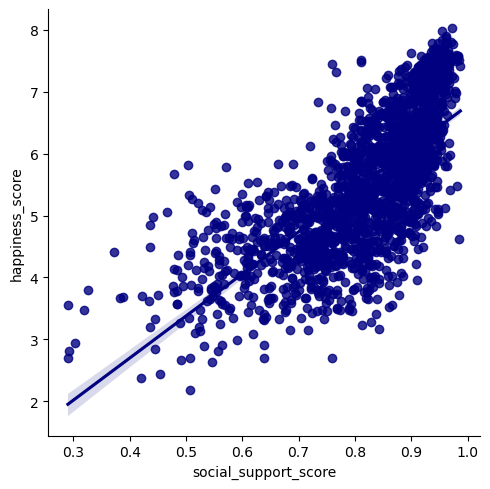

In [81]:
# 
flatui = ["navy", "mediumslateblue", "lavender"]
sns.set_palette(flatui)
sns.lmplot(x = 'social_support_score', y = 'happiness_score', data = df_merged)

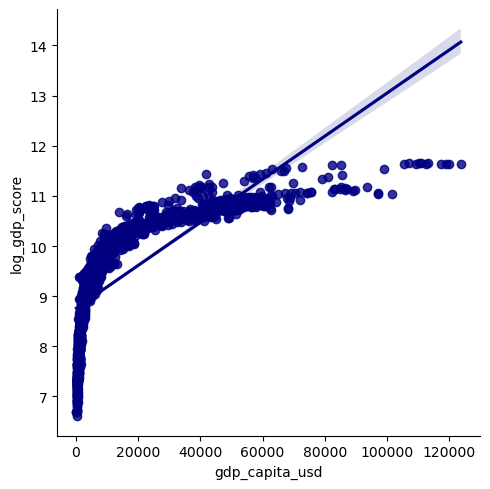

In [82]:
# 
flatui = ["navy", "mediumslateblue", "lavender"]
sns.set_palette(flatui)
sns.lmplot(x = 'gdp_capita_usd', y = 'log_gdp_score', data = df_merged)

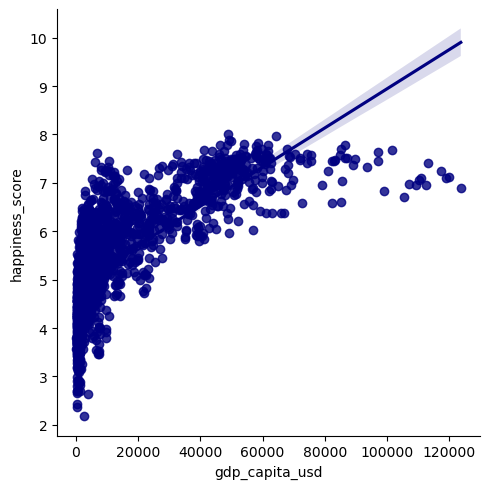

In [83]:
# 
flatui = ["navy", "mediumslateblue", "lavender"]
sns.set_palette(flatui)
sns.lmplot(x = 'gdp_capita_usd', y = 'happiness_score', data = df_merged)

In [84]:
# calculating population
pop = []
for i in range(len(df_merged)):
    pop.append(df_merged['gdp_usd'].iloc[i]/df_merged['gdp_capita_usd'].iloc[i])

In [85]:
df_merged['population'] = pop

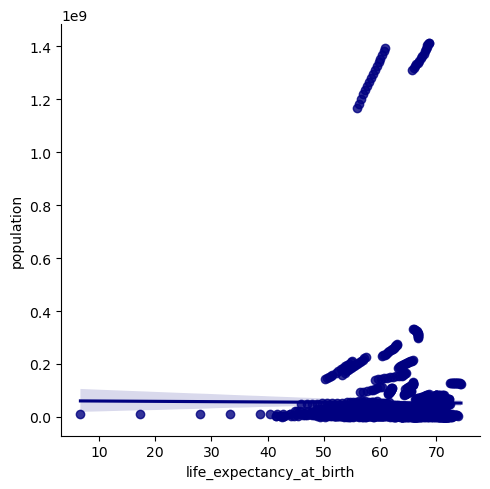

In [86]:
# 
flatui = ["navy", "mediumslateblue", "lavender"]
sns.set_palette(flatui)
sns.lmplot(x = 'life_expectancy_at_birth', y = 'population', data = df_merged)

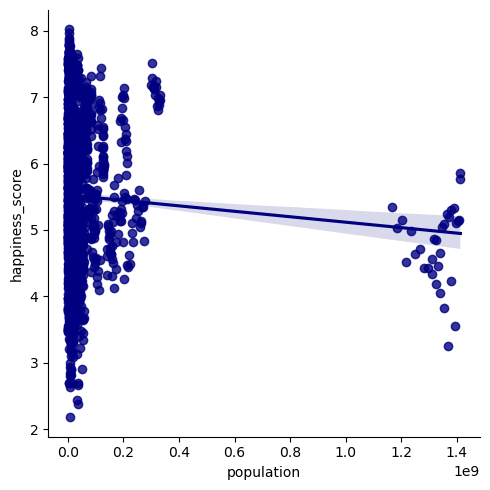

In [87]:
# 
flatui = ["navy", "mediumslateblue", "lavender"]
sns.set_palette(flatui)
sns.lmplot(x = 'population', y = 'happiness_score', data = df_merged)

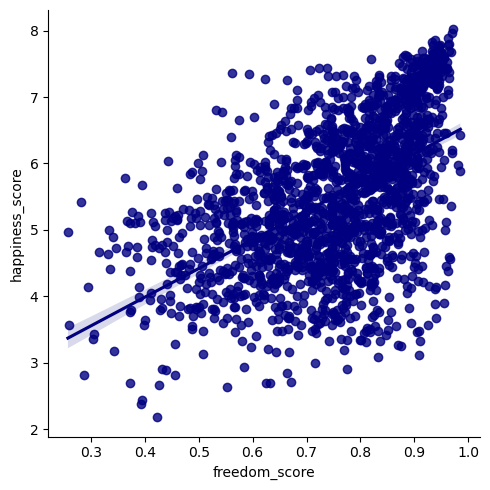

In [88]:
# 
flatui = ["navy", "mediumslateblue", "lavender"]
sns.set_palette(flatui)
sns.lmplot(x = 'freedom_score', y = 'happiness_score', data = df_merged)

I want to make sure the GDP calulcation are based on the correct values so I will calculate the GDP using the log values provided

In [89]:
# calculating gdp per capita 
gdp = []
for i in range(len(df_merged)):
    gdp.append(np.exp(df_merged['log_gdp_score'].iloc[i]))

In [90]:
# gdp_per_capita
gdp

[1556.8443251684669,
 1823.7425429987743,
 2026.164159635997,
 1961.0959889921712,
 2122.8308255008087,
 2165.3410090781267,
 2144.449347600559,
 2108.713635214653,
 2101.4222239887445,
 2096.0931494815973,
 2060.699410870795,
 2079.9220520142303,
 1516.3058699014696,
 9151.783909008758,
 10315.772658484348,
 10751.419216699416,
 11054.792839072981,
 11229.994253245615,
 11363.32348742017,
 11588.92583835104,
 11880.596700855223,
 12294.078196641953,
 12773.265029180138,
 13319.501014249443,
 13655.664742838651,
 13256.127230288153,
 14518.90874134914,
 11007.74640971925,
 11113.968538090257,
 11270.700677299135,
 11561.262441432356,
 11888.326425690235,
 11809.486640007224,
 11725.879087691097,
 11627.284578160643,
 10844.768784234537,
 11039.800797901999,
 7664.43769088684,
 8012.10254796116,
 8100.3874107140455,
 8183.680211280127,
 20679.24530498072,
 22316.264915580112,
 22992.381709022502,
 21413.2779167148,
 23521.271948656416,
 24647.636437866055,
 24118.868537051283,
 24424.12

In [91]:
# adding gdp per capita column
df_merged['gdp_per_capita_2'] = gdp

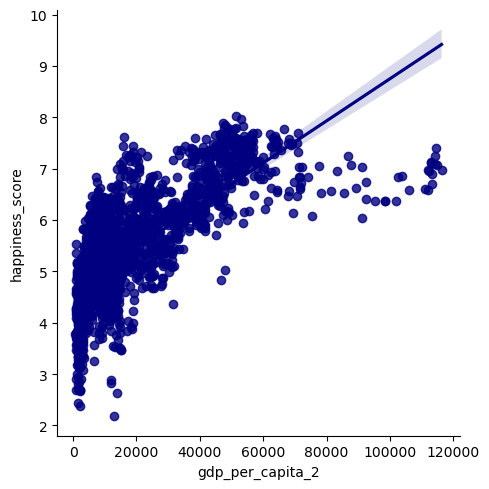

In [92]:
# gdp per capita vs happiness score
flatui = ["navy", "mediumslateblue", "lavender"]
sns.set_palette(flatui)
sns.lmplot(x = 'gdp_per_capita_2', y = 'happiness_score', data = df_merged)

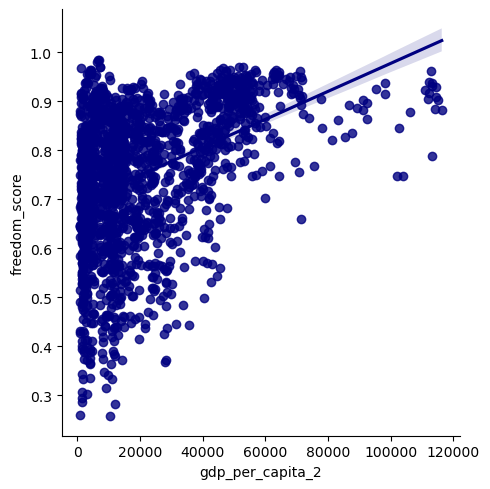

In [93]:
# gdp per capita vs freedom score 
flatui = ["navy", "mediumslateblue", "lavender"]
sns.set_palette(flatui)
sns.lmplot(x = 'gdp_per_capita_2', y = 'freedom_score', data = df_merged)

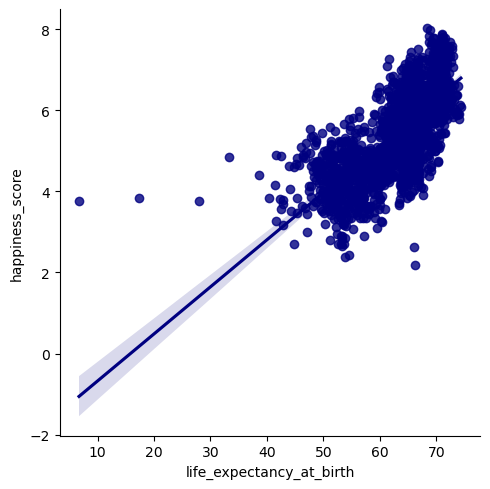

In [94]:
# happiness vs life expectancy 
sns.set_palette(flatui)
sns.lmplot(x = 'life_expectancy_at_birth', y = 'happiness_score', data = df_merged)

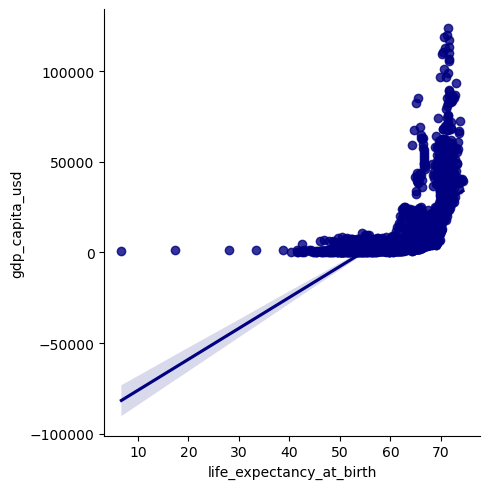

In [95]:
# gdp per capita vs life expectancy 
sns.set_palette(flatui)
sns.lmplot(x = 'life_expectancy_at_birth', y = 'gdp_capita_usd', data = df_merged)

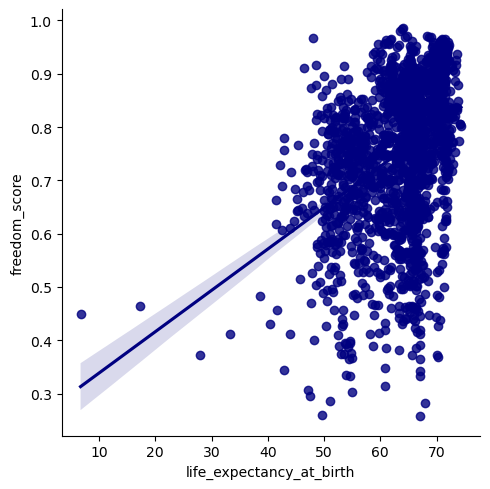

In [96]:
# freedom vs life expectancy 
sns.set_palette(flatui)
sns.lmplot(x = 'life_expectancy_at_birth', y = 'freedom_score', data = df_merged)

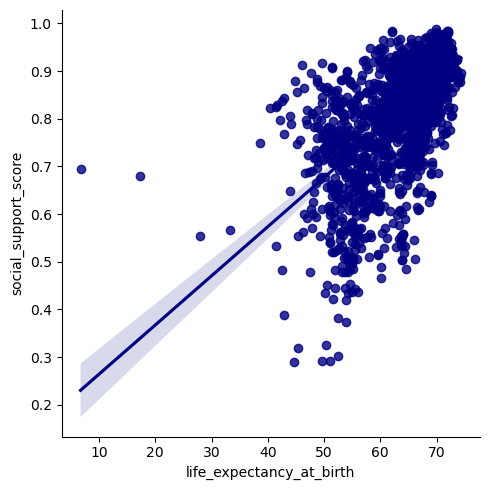

In [97]:
# social vs life expectancy 
sns.set_palette(flatui)
sns.lmplot(x = 'life_expectancy_at_birth', y = 'social_support_score', data = df_merged)

# 6. Hypothesis

The higher the life expactnacy at birth the higher the happiness score

# 7. Life Expectancy Linear Regression

In [98]:
# reshaping variables into numpy arrays
X = df_merged['life_expectancy_at_birth'].values.reshape(-1,1)
y = df_merged['happiness_score'].values.reshape(-1,1)

In [99]:
# checking the array
X

array([[50.5       ],
       [50.79999924],
       [51.09999847],
       ...,
       [53.09999847],
       [53.57500076],
       [54.04999924]])

In [100]:
# checking the array
y

array([[3.7235899 ],
       [4.40177822],
       [4.75838089],
       ...,
       [2.69352317],
       [3.1598022 ],
       [3.15457821]])

In [101]:
# spliting the arrays into test and training sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [102]:
# creating regression object
regress = LinearRegression()

In [103]:
# fiting the linear regression to the training set
regress.fit(X_train, y_train)

LinearRegression()

In [104]:
# predicting the y values from the X_test
y_predict = regress.predict(X_test)

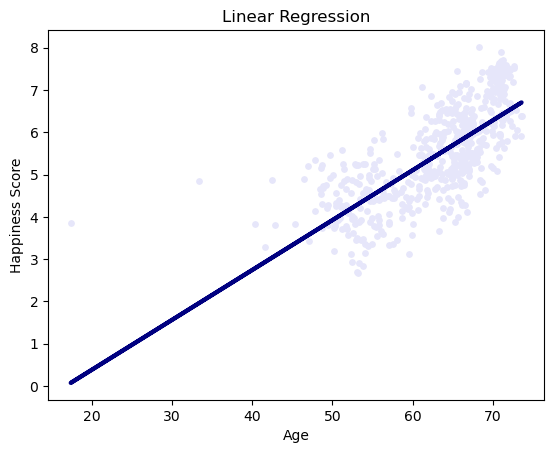

In [123]:
# creating regression line superimposed over test data
plot_test = plt
plot_test.scatter(X_test, y_test, color='lavender', s = 15)
plot_test.plot(X_test, y_predict, color='navy', linewidth =3)
plot_test.title('Linear Regression')
plot_test.xlabel('Age')
plot_test.ylabel('Happiness Score')
plot_test.show()

The regression follows the general shape of the data, but there is a lot of variance

In [106]:
# calculating model summary statistics
rmse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [107]:
# checking the model's accuracy
print('Slope: ', regress.coef_)
print('Mean Squared Error: ', rmse)
print('R2 Score: ', r2)

Slope:  [[0.11800158]]
Mean Squared Error:  0.6287053281901298
R2 Score:  0.5174922935033595


In [108]:
# comparing the test and predicted y-values
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})
data.head(30)

,Actual,Predicted
0,5.448006,5.679418
1,5.061862,5.478815
2,3.932777,4.340100
3,7.463097,6.437578
4,5.792797,5.933122
5,5.777491,5.844621
6,3.878578,4.475802
7,4.550648,6.097144
8,4.179177,5.030410
9,6.007022,6.045223


The regression has a root mean squared error of over half a point. Consider happiness score range from abour 2-8, a half divergence from the prediction would mean that any prediction could reasonably be around 10% of a given value. While this would give a decent ballpark answer, it is not a very reliable model.

There are a couple of countries with extremely low values life expectencies. These appear to be outliers and could be the result of measurement bias. 

# 8. GDP Per Capita Linear Regression

In [109]:
# reshaping variables into numpy arrays
X1 = df_merged['gdp_capita_usd'].values.reshape(-1,1)
y1 = df_merged['happiness_score'].values.reshape(-1,1)

In [110]:
# spliting the arrays into test and training sets 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [111]:
# creating regression object
regress1 = LinearRegression()

In [112]:
# fiting the linear regression to the training set
regress1.fit(X1_train, y1_train)

LinearRegression()

In [113]:
# predicting the y values from the X_test
y1_predict = regress1.predict(X1_test)

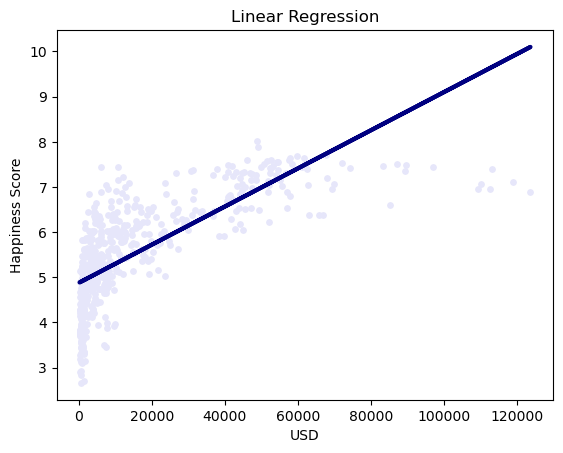

In [114]:
# creating regression line superimposed over test data
plot_test = plt
plot_test.scatter(X1_test, y1_test, color='lavender', s = 15)
plot_test.plot(X1_test, y1_predict, color='navy', linewidth =3)
plot_test.title('Linear Regression')
plot_test.xlabel('USD')
plot_test.ylabel('Happiness Score')
plot_test.show()

The linear regression does not fit the data well

In [115]:
# calculating model summary statistics
rmse_1 = mean_squared_error(y1_test, y1_predict)
r2_1 = r2_score(y1_test, y1_predict)

In [116]:
# checking the model's accuracy
print('Slope: ', regress1.coef_)
print('Mean Squared Error: ', rmse_1)
print('R2 Score: ', r2_1)

Slope:  [[4.22332357e-05]]
Mean Squared Error:  0.6690618666458841
R2 Score:  0.4865201672316052


In [117]:
# comparing the test and predicted y-values
data = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predict.flatten()})
data.head(30)

,Actual,Predicted
0,5.448006,4.952224
1,5.061862,5.170193
2,3.932777,4.942711
3,7.463097,7.118117
4,5.792797,5.376022
5,5.777491,5.256671
6,3.878578,4.911794
7,4.550648,5.064252
8,4.179177,4.951046
9,6.007022,5.409105


The regression is not a reliable preditor (r2 is only 0.49)

# 9. Exporting

In [118]:
# dropping, country name, region, key, country code, year_y, gdp_mean, gdp_capita_mean, _merge, and gdp_per_capita_2 cols because they are not relevant to the analysis
df_merged = df_merged.drop(['key','country_name_y', 'country_code', 'year_y',
       'gdp_mean', 'gdp_capita_mean', '_merge', 'gdp_per_capita_2'], axis=1)

In [119]:
# renaming columns 
df_merged = df_merged.rename(columns = {'year_x':'year', 'country_name_x' : 'country'})

In [120]:
#checking columns
df_merged.columns

Index(['country', 'region', 'year', 'happiness_score', 'log_gdp_score',
       'social_support_score', 'life_expectancy_at_birth', 'freedom_score',
       'generosity_score', 'corruption_score', 'gdp_usd', 'gdp_capita_usd',
       'population'],
      dtype='object')

In [121]:
# exporting data
df_merged.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'all_years_merged.csv'))

In [122]:
df_merged.describe()

,year,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score,gdp_usd,gdp_capita_usd,population
count,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1.859000e+03,1859.000000,1.859000e+03
mean,2013.729962,5.504430,9.396828,0.813191,63.250610,0.751434,0.002124,0.742997,5.793002e+11,14990.152615,5.385495e+07
std,4.468671,1.137417,1.147545,0.120062,7.040891,0.141205,0.158564,0.185008,2.009542e+12,20328.005101,1.761681e+08
min,2005.000000,2.178809,6.607256,0.290184,6.720000,0.257534,-0.337527,0.035198,9.053411e+08,198.352852,2.990310e+05
25%,2010.000000,4.652200,8.510371,0.751663,59.137501,0.661184,-0.104673,0.696495,1.696302e+10,1681.082572,5.003698e+06
50%,2014.000000,5.448725,9.498955,0.838044,65.099998,0.772919,-0.013133,0.790627,5.884702e+10,5682.046108,1.143210e+07
75%,2018.000000,6.354568,10.360643,0.906363,68.532501,0.863320,0.088294,0.866092,3.216870e+11,19309.234305,3.678648e+07
max,2021.000000,8.018934,11.663788,0.987343,74.349998,0.985178,0.702708,0.983276,2.299610e+13,123678.702100,1.412363e+09
